### Predicting if someone has Heart-Disease or not

This notebook uses python-based packages and attempts to build a Machine Learning model to check if the person is suffering from heart-disease or not based on there medical attributes.

Approach Taken:
1. Problem Definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition:

>Given clinical parameters of the statement can we predict if the patient has heart-disease or not.

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

Another version of the same is available of Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

>If 95% accuracy can be achieved at predicting wheather a patient has heart disease or not during the proof of concept, the project can be pursued

## 4. Features 

This is where we can get information of the different features of the data.

**Create Data Dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

Pandas matplotlib numpy are used for Data analysis and manipulation.

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Udemy_ML_DataScience_Course\heart-disease-project\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [2]:
#Regular EDA(expoloratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#we want the plots to appear inside the notebook
%matplotlib inline 

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
heart_disease_df = pd.read_csv("heart-disease.csv")
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Data Exploration (Exploritary Data Analysis)**

The goal is to find out more about the data and become a subject expert on the dataset being worked with.

1. Questions we are trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. Outliers and why should we care about them ?
5. How can you add, change or remove features to get more out of the data?

In [4]:
#Counting the number of targets in each count
heart_disease_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

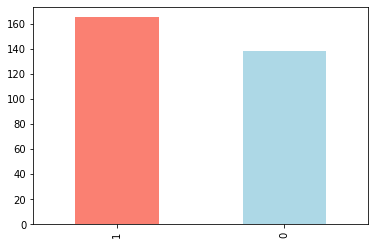

In [11]:
heart_disease_df['target'].value_counts().plot(kind='bar' , color=['salmon' , 'lightblue'])

In [13]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency based on Sex

In [15]:
heart_disease_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
#Performing Cross tab- Compare target column with the sex column
pd.crosstab(heart_disease_df.target , heart_disease_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

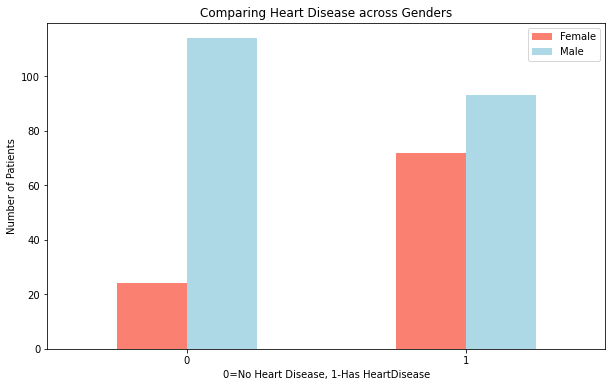

In [19]:
#Visualising the data
pd.crosstab(heart_disease_df.target , heart_disease_df.sex).plot(kind='bar' , figsize=(10,6) , color=['salmon' , 'lightblue'])

plt.title("Comparing Heart Disease across Genders")
plt.xlabel("0=No Heart Disease, 1-Has HeartDisease")
plt.ylabel("Number of Patients")
plt.legend(["Female" , "Male"])
plt.xticks(rotation=0)

### Age vs Maximum Heart Rate for Heart Disease

In [23]:
heart_disease_df.chol[heart_disease_df.target==0].mean()

0    258
1     45
Name: fbs, dtype: int64

Text(0, 0.5, 'Heart Rate')

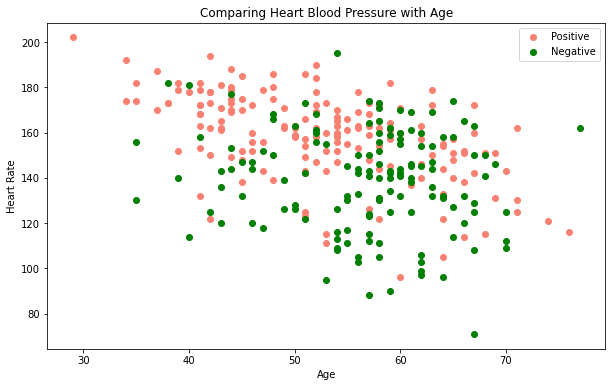

In [29]:
#Create figure
plt.figure(figsize=(10,6))

#Postiive plot
plt.scatter(heart_disease_df.age[heart_disease_df.target==1] , heart_disease_df.thalach[heart_disease_df.target==1] ,
            color = 'salmon')

#Negative Plot
plt.scatter(heart_disease_df.age[heart_disease_df.target==0] , heart_disease_df.thalach[heart_disease_df.target==0],
           color='green')

plt.legend(['Positive' , 'Negative'])
plt.title("Comparing Heart Blood Pressure with Age")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

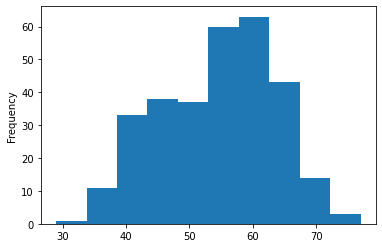

In [30]:
#Check the distribution of the age column with a Histogram
heart_disease_df.age.plot.hist()

In [31]:
heart_disease_df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### Heart Disease Frequency per Chest Pain type

In [32]:
pd.crosstab(heart_disease_df.cp , heart_disease_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

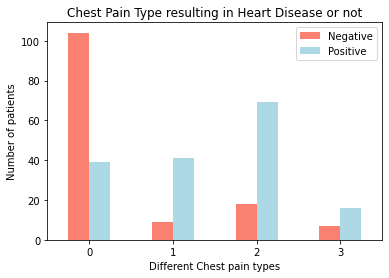

In [36]:
pd.crosstab(heart_disease_df.cp , heart_disease_df.target).plot(kind = 'bar' , color=['salmon' , 'lightblue'])

plt.title("Chest Pain Type resulting in Heart Disease or not")
plt.xlabel("Different Chest pain types")
plt.ylabel("Number of patients")
plt.legend(["Negative" , "Positive"])
plt.xticks(rotation=0)

In [37]:
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


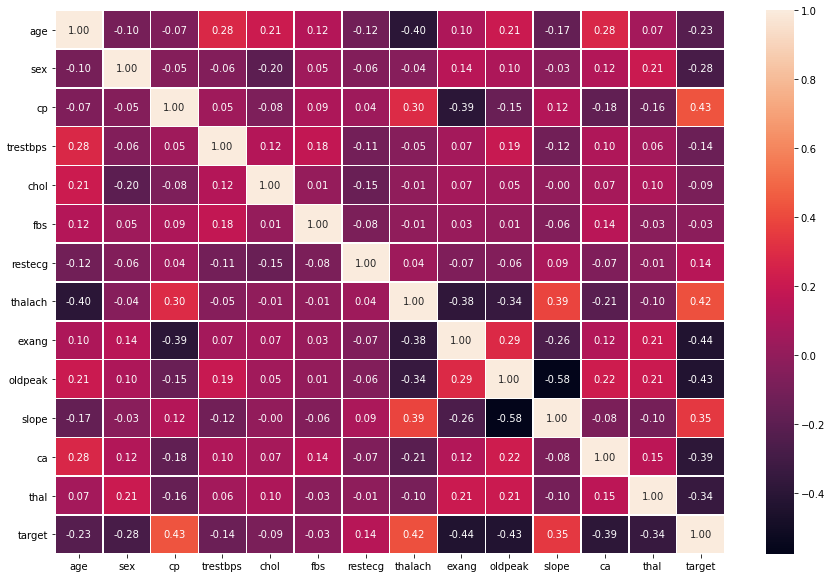

In [40]:
corr_matrix = heart_disease_df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5 , fmt=".2f" )

### 5. Modelling

In [42]:
x = heart_disease_df.drop("target" , axis = 1)
y = heart_disease_df['target']

In [43]:
#Train and test split
np.random.seed(42)

x_train , x_test , y_train,y_test = train_test_split(x , y , test_size = 0.2)

In [47]:
models = {"Logestic Regression" : LogisticRegression() , 
          "KNN" : KNeighborsClassifier() , "randomforest": RandomForestClassifier()}


def fit_and_score_model(models , x_train , x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning model 
    x_train = training data(features)
    x_test = test data(features)
    y_train = target training data
    y_test = target test data
    """
    np.random.seed(42)
    
    model_scores = {}
    
    #Looping through the models
    for name, model in models.items():
        model.fit(x_train , y_train)
        
        #Evaluate the model and append its score to model scores
        model_scores[name] = model.score(x_test , y_test)
    return model_scores

In [49]:
model_scores = fit_and_score_model(models , x_train , x_test , y_train ,y_test)
model_scores

C:\Udemy_ML_DataScience_Course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'randomforest': 0.8360655737704918}

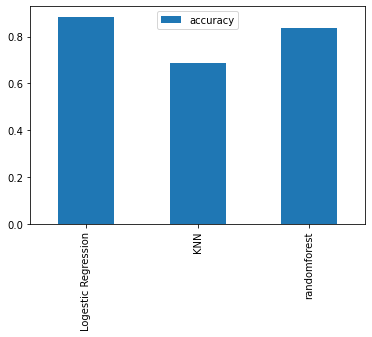

In [50]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar()

Baseline Model is already being made.. The next step is to improve the model

**The following steps are to be considererd:**

* Hyperparamter Tuning
* Feature Importance
* confusion matrix
* cross validation 
* precision
* recall
* f1 score
* Classification Report
* Area under curve
* ROC curve

### Hyperparamter Training

In [53]:
#Tuning KNN

train_scores = []
test_scores = []

neighbors = range(1 , 21)

knn = KNeighborsClassifier()

#Looping through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the data
    knn.fit(x_train , y_train)
    
    train_scores.append(knn.score(x_train , y_train))
    test_scores.append(knn.score(x_test , y_test))
    
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


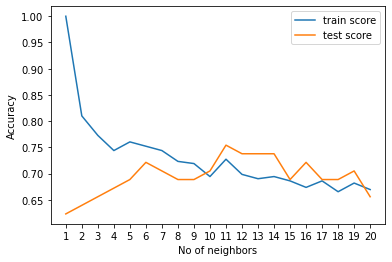

In [63]:
plt.plot(neighbors , train_scores , label='train score')
plt.plot(neighbors , test_scores , label='test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of neighbors")
plt.ylabel("Accuracy")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

### Hyperparameter Tuning with Randomzied Search CV

We're going to tune:
* Logistic Regression()
* RandomForestClassifier()

In [70]:
#Creating a Hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4 , 4 ,20),
                'solver':['liblinear']}

#Create a Hyperparamter grid for RandomForestClassifier
random_forest_grid = {"n_estimators" : np.arange(10 , 1000 , 50),
                     "max_depth" : [None, 3, 5 , 10],
                     "min_samples_split" : np.arange(2, 20 , 2),
                     "min_samples_leaf": np.arange(1,20,2)}

In [65]:
np.random.seed(42)

#setting up logistic regression for Randomzied Search CV
rs_log_reg = RandomizedSearchCV(LogisticRegression() , param_distributions=log_reg_grid , cv=5 , n_iter = 20 ,
                               verbose = True)

rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [66]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [67]:
rs_log_reg.score(x_train , y_train)

0.859504132231405

In [71]:
np.random.seed(42)

rs_random_forest = RandomizedSearchCV(RandomForestClassifier() , param_distributions = random_forest_grid , cv = 5 , n_iter = 20,
                                     verbose = True)

rs_random_forest.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [72]:
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [73]:
rs_random_forest.score(x_test , y_test)

0.8688524590163934

### Hyperparamter tuning with GridSearchCV

In [82]:
gs_log_reg_grid = {'C' : np.logspace(-4 , 4 , 30) , 'solver' : ['liblinear']}

In [86]:
gs_log_reg = GridSearchCV(LogisticRegression() , param_grid=gs_log_reg_grid , cv=5, verbose = True)

gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [87]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [88]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

### Evaluating our tuned Machine Learning classifier,beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score



In [89]:
y_preds = gs_log_reg.predict(x_test)

In [90]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

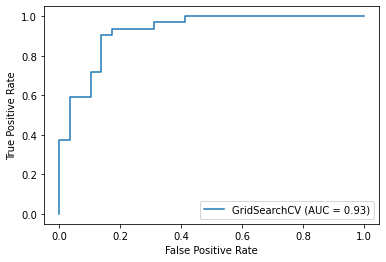

In [91]:
plot_roc_curve(gs_log_reg , x_test , y_test)

In [92]:
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


In [97]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    """
    Plots a confusion matrix using Seaborn's Function()
    """
    fig , ax = plt.subplots(figsize=(3 , 3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds) , annot= True , cbar = False)
    plt.xlabel("True Labels")
    plt.ylabel("Actual Label")
    plt.title("Confusion Matrix HeatMap")

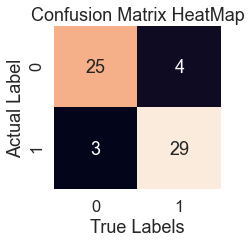

In [98]:
plot_conf_mat(y_test , y_preds)

In [99]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculation of Evaluation Metrics using cross validation

In [100]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [101]:
clf = LogisticRegression(C=0.20433597178569418 , solver='liblinear')

In [103]:
cv_acc = cross_val_score(clf , x , y , scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [105]:
cp_acc_mean = np.mean(cv_acc)

In [106]:
cv_precision = cross_val_score(clf , x , y , scoring = 'precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [107]:
cv_precision_mean = np.mean(cv_precision)

In [111]:
cv_recall = cross_val_score(clf , x , y , scoring = 'recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [113]:
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9212121212121213

In [108]:
cv_f1 = cross_val_score(clf , x , y , scoring = 'f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [109]:
cv_f1_mean = np.mean(cv_f1)

In [110]:
cv_f1_mean

0.8673007976269721

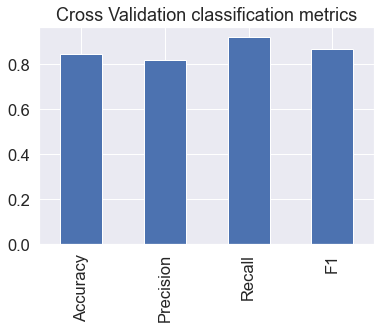

In [119]:
#Visualise cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy" : cp_acc_mean , "Precision" : cv_precision_mean , 
                           "Recall" : cv_recall_mean , "F1" : cv_f1_mean} , index=[0])

cv_metrics.T.plot.bar(title = 'Cross Validation classification metrics' , legend = False)

### Feature Importance
Feature importance is another as asking "Which feature contributed to the most of the outcomes of the model and how did they contribute?"

Finding feature importance is different for each Machine Learning Model

In [120]:
clf = LogisticRegression(C=0.20433597178569418 , solver='liblinear')

clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [121]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [122]:
feature_dict = dict(zip(heart_disease_df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

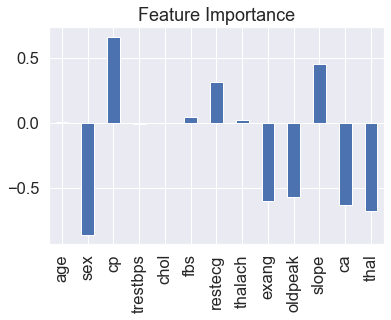

In [123]:
feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar(title="Feature Importance" , legend = False)

### 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?